In [1]:
import os
import glob
import numpy as np
import pandas as pd

from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr,spearmanr

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/li/Desktop/debate2025/results/ISFC-ISRSA-Exp1-seed89-2min.csv')
nw_labels = pd.read_csv('/Users/li/Desktop/template/Schaefer/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv')
roi_name = list(nw_labels['ROI Name'])
del roi_name[89]
print(len(roi_name),df.shape)
df["roi_name"] = roi_name
df["network"] = df["roi_name"].apply(lambda x: x.split("_")[2] if "_" in x else "Unknown")
# 只保留 p < 0.08 的数据


# 自定义网络排序，确保 Default 在第一个
network_order = ["Default", "Cont", "Limbic", "SalVentAttn", "DorsAttn", "SomMot", "Vis"]
df["network"] = pd.Categorical(df["network"], categories=network_order, ordered=True)

# 按网络排序（Default 第一），在每个网络内按 r 值降序排序
df = df.sort_values(by=["network", "pearson control"], ascending=[True, False]).reset_index(drop=True)
df["roi_name"] = df["roi_name"].str.replace("7Networks_", "", regex=False)

df["roi_name"] = [
    name.replace('7Networks_', '')
        .replace('LH_', 'L_')
        .replace('RH_', 'R_')
        .replace('SomMot', 'SM')
        .replace('DorsAttn', 'DA')
        .replace('SalVentAttn', 'VA')
        .replace('Default', 'Def')
    for name in df["roi_name"]
]

# 可视化排序后的 df
df.head()



199 (199, 8)


,pearson control,p1,pearson no-control,p2,spearman control,p3,spearman no-control,p4,roi_name,network
0,0.258909,0.0004,0.262667,0.000500,0.254925,0.0004,0.258946,0.000400,R_Def_Par_2,Default
1,0.247435,0.0008,0.251558,0.000700,0.226101,0.0007,0.226475,0.001200,R_Def_pCunPCC_2,Default
2,0.233088,0.0042,0.237122,0.005599,0.229315,0.0046,0.226821,0.005999,R_Def_pCunPCC_3,Default
3,0.230717,0.0008,0.237404,0.000200,0.223940,0.0013,0.228943,0.001200,L_Def_Temp_4,Default
4,0.224568,0.0019,0.225916,0.002300,0.224839,0.0023,0.226200,0.002700,R_Def_Temp_4,Default


In [5]:
df = df[df["p1"] < 0.05].copy()
df.reset_index(drop=True, inplace=True)

In [7]:
print(df['network'])

0         Default
1         Default
2         Default
3         Default
4         Default
5         Default
6         Default
7         Default
8         Default
9         Default
10        Default
11        Default
12        Default
13        Default
14        Default
15        Default
16        Default
17           Cont
18           Cont
19           Cont
20         Limbic
21         Limbic
22    SalVentAttn
23       DorsAttn
24       DorsAttn
25       DorsAttn
26         SomMot
27            Vis
28            Vis
29            Vis
Name: network, dtype: category
Categories (7, object): ['Default' < 'Cont' < 'Limbic' < 'SalVentAttn' < 'DorsAttn' < 'SomMot' < 'Vis']


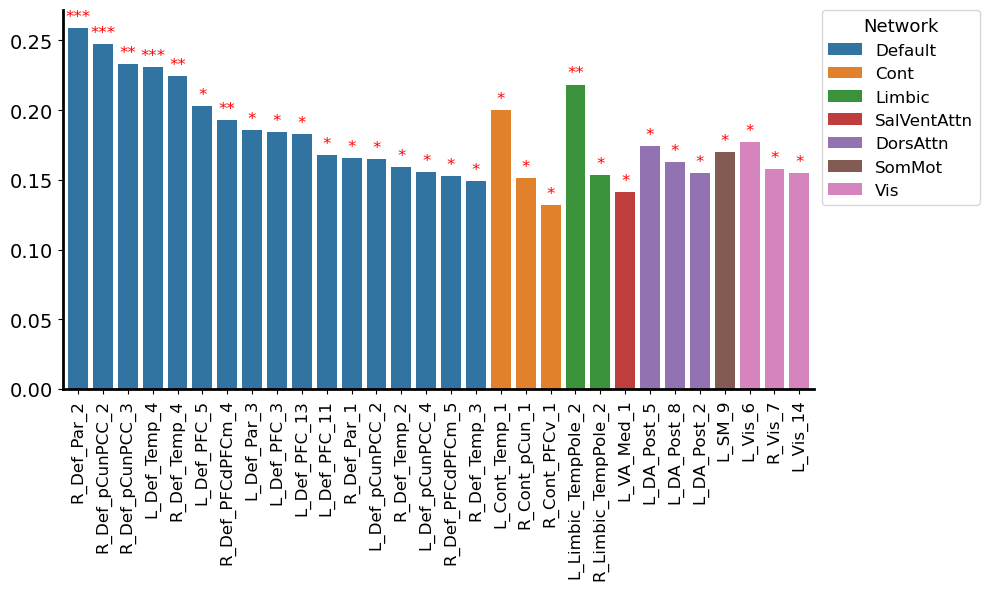

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("muted")

# 创建颜色映射
network_colors = sns.color_palette("tab10", len(df["network"].unique()))
network_palette = dict(zip(df["network"].unique(), network_colors))

# 设置图像尺寸
plt.figure(figsize=(10, 6))

# 画图，并保存 ax 以供后续添加显著性标记
ax = sns.barplot(
    data=df,
    x="roi_name",
    y="pearson control",
    hue="network",
    palette=network_palette
)

# 旋转 x 轴标签避免重叠
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=14)

# 添加显著性标记
for i, row in df.iterrows():
    sig_y = row["pearson control"] + 0.005  # 根据值做微调
    if row["p1"] < 0.001:
        ax.text(i, sig_y, "***", ha="center", fontsize=12, color="red")
    elif row["p1"] < 0.01:
        ax.text(i, sig_y, "**", ha="center", fontsize=12, color="red")
    elif row["p1"] < 0.05:
        ax.text(i, sig_y, "*", ha="center", fontsize=12, color="red")

# 设置坐标轴标签和标题
plt.xlabel("", fontsize=14)
plt.ylabel("", fontsize=14)
plt.title("", fontsize=16)

# 美化边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_xlim(-0.6, len(df) - 0.4)
# ax.set_ylim(0.1, 0.28)
# 图例设置
plt.legend(title="Network", bbox_to_anchor=(1.01, 1), borderaxespad=0, fontsize=12, title_fontsize=13)

# 保存图像（可选）
# plt.savefig("brain_region_correlation_p08.png", dpi=300, bbox_inches="tight")

# 显示图像
plt.tight_layout()
# 保存图像
plt.savefig('/Users/li/Desktop/Figure/5c_bar.png', dpi=300)
plt.show()
